<a href="https://colab.research.google.com/github/Francesfahey/algorithims_data/blob/main/CA3_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
ortho_df = pd.read_csv('https://raw.githubusercontent.com/Francesfahey/algorithims_data/main/column_2C_weka.csv', index_col=0)
print(ortho_df.head())


                  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
pelvic_incidence                                                             
63.027817                   22.552586              39.609117     40.475232   
39.056951                   10.060991              25.015378     28.995960   
68.832021                   22.218482              50.092194     46.613539   
69.297008                   24.652878              44.311238     44.644130   
49.712859                    9.652075              28.317406     40.060784   

                  pelvic_radius  degree_spondylolisthesis     class  
pelvic_incidence                                                     
63.027817             98.672917                 -0.254400  Abnormal  
39.056951            114.405425                  4.564259  Abnormal  
68.832021            105.985135                 -3.530317  Abnormal  
69.297008            101.868495                 11.211523  Abnormal  
49.712859            108.168725  

<ipython-input-4-dc78ec9c7b66>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = ortho_df.drop('class', 1) # Features , 1 is col, 0 is row


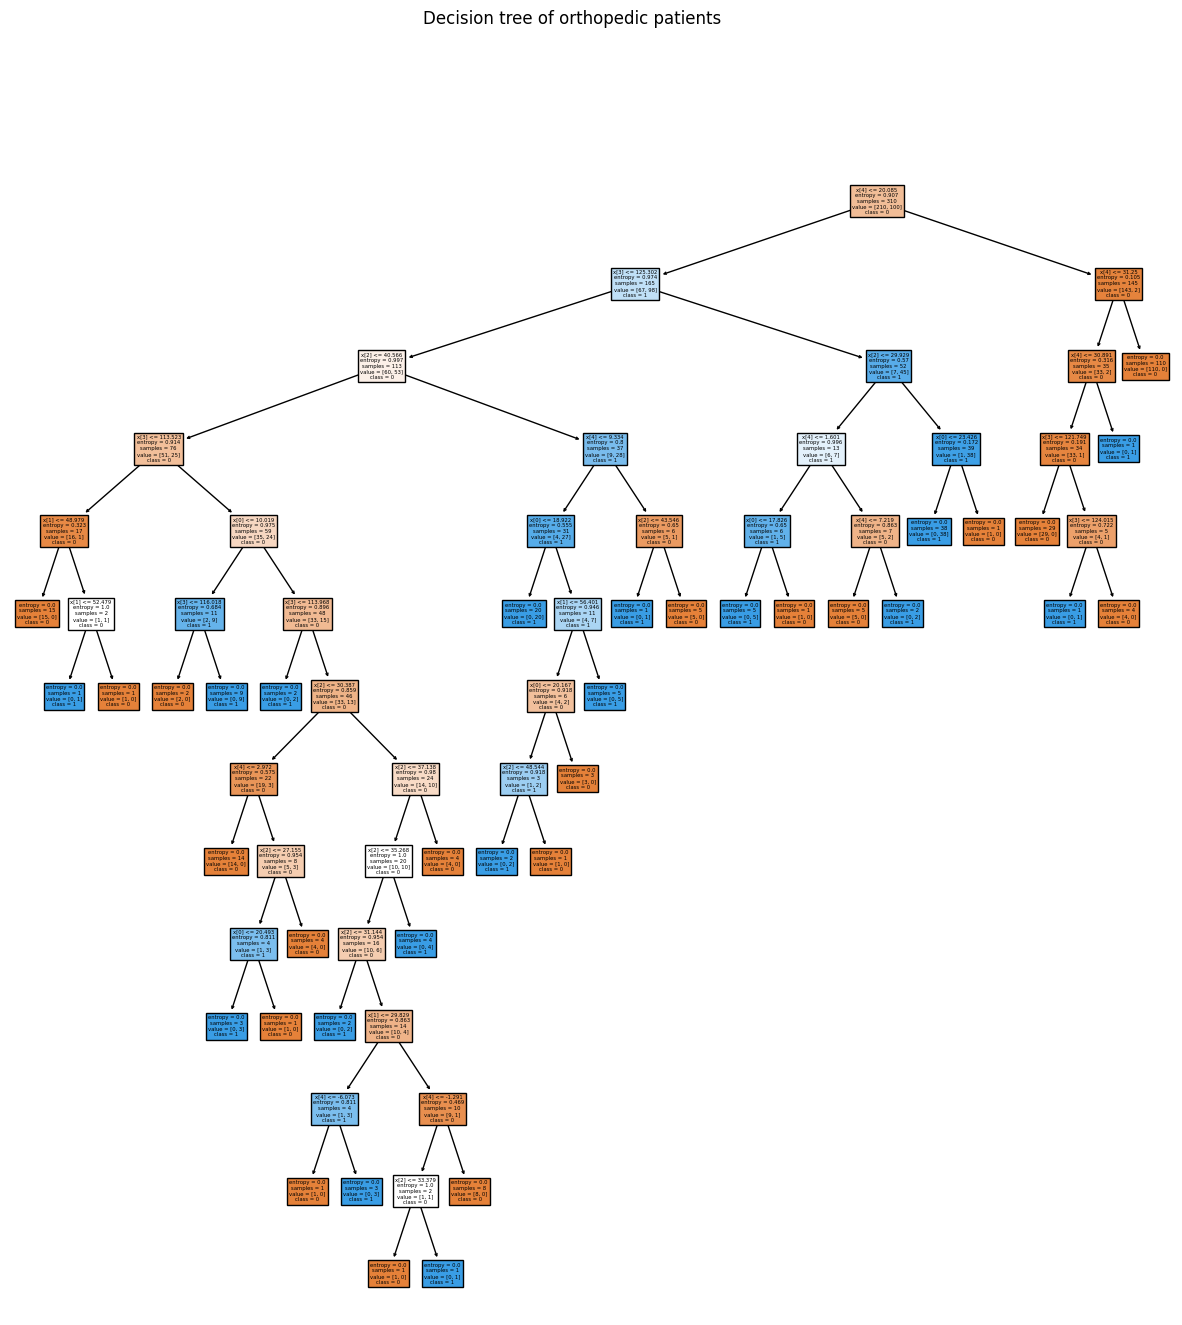

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

#split dataset in features and target variable
feature_cols = ['pelvic_incidence', 'pelvic_tilt_numeric', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','class']
#X = pima[feature_cols] # Features
X = ortho_df.drop('class', 1) # Features , 1 is col, 0 is row
y = ortho_df['class'].values # Target variable
plt.figure(figsize =[15,15])
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
plt.suptitle("Decision tree of orthopedic patients")
tree.plot_tree(clf, class_names=['0','1'] , filled=True )
plt.show()

In [5]:
#Building the model/decicion tree classifier

from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.3, stratify=y)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

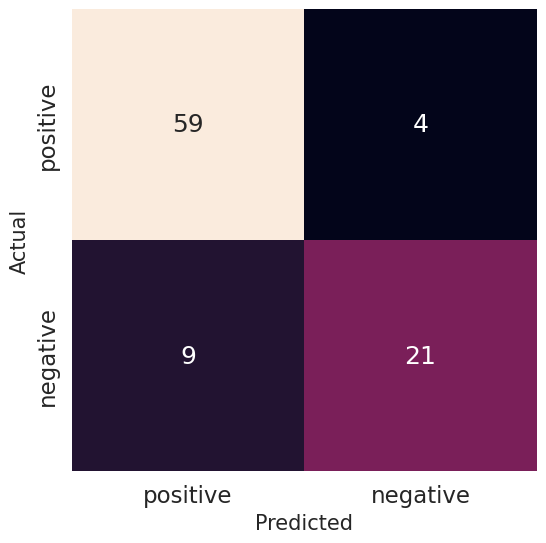

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create confusion matrix
predictdt_y = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,predictdt_y)
cf_matrix = pd.DataFrame(data = cf_matrix,
columns=['positive', 'negative'],
index=['positive', 'negative'])
#plot confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.5)
sns.heatmap(cf_matrix,annot=True, cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)
plt.show()
